# Links

The following online GUI tools can be used to generate perceptually uniform colormaps.

* [Chroma.js](https://gka.github.io/palettes/)
* [HCL picker](http://tristen.ca/hcl-picker/#/hlc/12/0.99/C6F67D/0B2026)
* [HCLWizard](http://hclwizard.org/hclcolorpicker/)

You can programatically generate perceptually uniform colormaps with [ProPlot](https://proplot.readthedocs.io/). Also, to make sure your colormaps are colorblind friendly, we recommend the [Color Oracle](https://colororacle.org) app or [viz palette](https://projects.susielu.com/viz-palette).

# Create your own colormaps 
The below cells use ProPlot to [register named colormaps](https://proplot.readthedocs.io/en/latest/colors.html#adding-online-color-colormaps).

## Using data copied from online tools
Paste lists of hex values in the "hexdata" string. Paste tables of RGB values in the "rgbdata" string.

In [1]:
import os
import proplot as plot

# Paste a list of hex strings in the below string
name = 'tmp'
hexdata = """
#000000 #ffffff
"""
with open(os.path.expanduser(f'~/.proplot/cmaps/{name}.hex'), 'w') as f:
    f.write(hexdata)
    
# Paste a 3-column table of RGB data in the below string
name = 'tmp'
rgbdata = """
0, 0, 0
1, 1, 1
"""
with open(os.path.expanduser(f'~/.proplot/cmaps/{name}.rgb'), 'w') as f:
    f.write(rgbdata)
    
# Load new colormaps into ProPlot
plot.register_cmaps()

## Using ProPlot API
Use the below cells to *programatically* generate perceptually uniform colormaps. See the [Color Usage](https://proplot.readthedocs.io/en/latest/colors.html#making-your-own-colormaps) documentation for more details.

In [2]:
import proplot as plot

# From from single named color
name = 'ocean'
cmap = plot.Colormap('ocean blue', name=name)

# From lists of channel values
name = 'boulder'
cmap = plot.Colormap({
    # 'hue':['red-90', 'red+90'],
    'hue':[-50, 120],
    'saturation':[50, 70, 30],
    'luminance':[20, 100]},
    name=name, space='hcl')

name = 'space'
cmap = plot.Colormap(
    {'hue':['red', 'red-720'],
     'saturation':[80,20],
     'luminance':[20, 100]},
    name=name, space='hpl')

# From lists of colors
name = 'reddish'
cmap = plot.Colormap(
     ('maroon', 'goldenrod'),
    name=name, space='hsl')

## HCL channels

Use this cell to create and save channel-by-channel breakdowns.

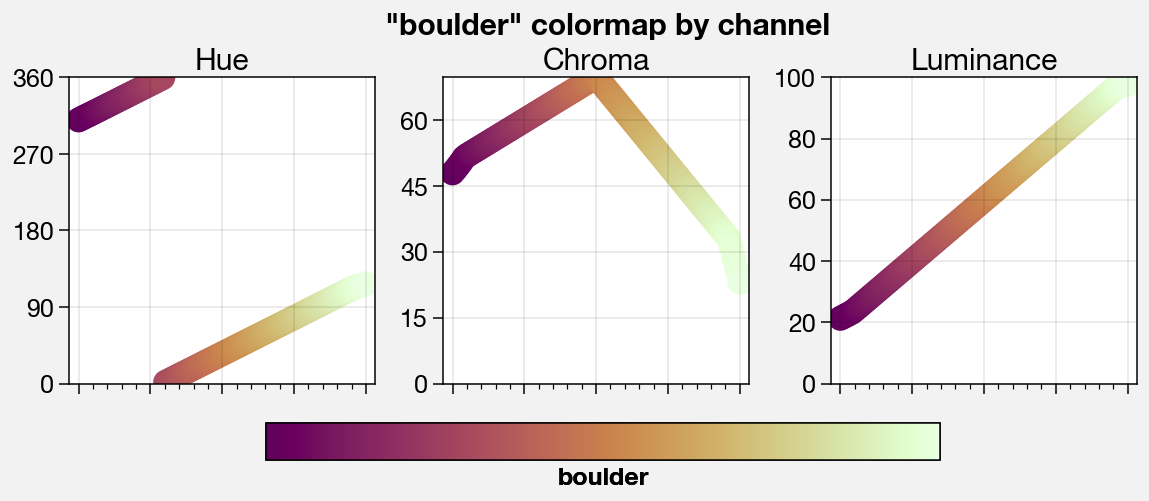

In [3]:
import proplot as plot

# Breakdown your colormap!
cmap = 'boulder'
f = plot.show_channels(cmap, rgb=False, scalings=False)

# Save breakdown
f.save(f'../figures/{cmap}_breakdown.png')

# Try out your colormaps

We've added a few observational datasets to the repository to try out your colormaps. Just replace the `cmap` variable(s) with the name of your colormap from above.

## Sequential Colormaps

These examples anticipate a sequential colormap. They are mainly comprised of climatologies.

### Model Data

Results from the Dry Dynamical Core model. This looks at Available Potential Energy (APE) and Eddy Kinetic Energy.

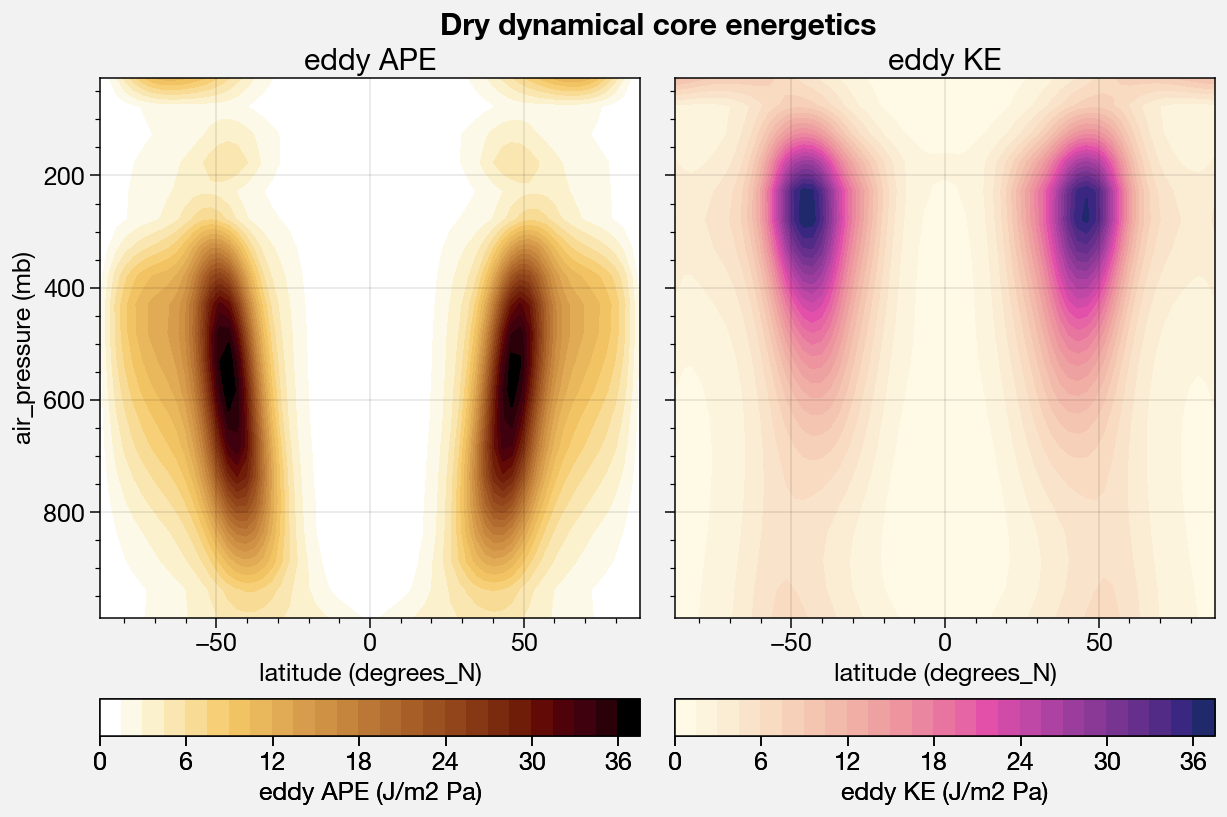

In [4]:
import proplot as plot
import xarray as xr

# Load data
data = xr.open_dataset('../data/HS94.climate.d0500-d3500.nc',decode_times=False)
data = xr.open_dataset('../data/HS94.climate.d0500-d3500.nc',decode_times=False)
tvar = data['pe'].isel(lon=0, time=0)
uvar = data['ke'].isel(lon=0, time=0)

# Your colormaps here!
cmap1 = 'stellar'
cmap2 = 'sunset'

# Plot data
f, axs = plot.subplots(ncols=2, axwidth=3, span=False)

N = 30 # number of levels
axs[0].contourf(tvar, N=N, cmap=cmap1, colorbar='b')
axs[1].contourf(uvar, N=N, cmap=cmap2, colorbar='b')

axs.format(suptitle='Dry dynamical core energetics', yreverse=True)

# Uncomment this to save your figure (feel free to rename it)
# f.save('../figures/drycore.climo.png')

### Oceanography Data

1970-2010 Sea Surface Temperature (SST) climatology from the Hadley Center-NOAA/OI merged product [(link)](https://climatedataguide.ucar.edu/climate-data/merged-hadley-noaaoi-sea-surface-temperature-sea-ice-concentration-hurrell-et-al-2008).

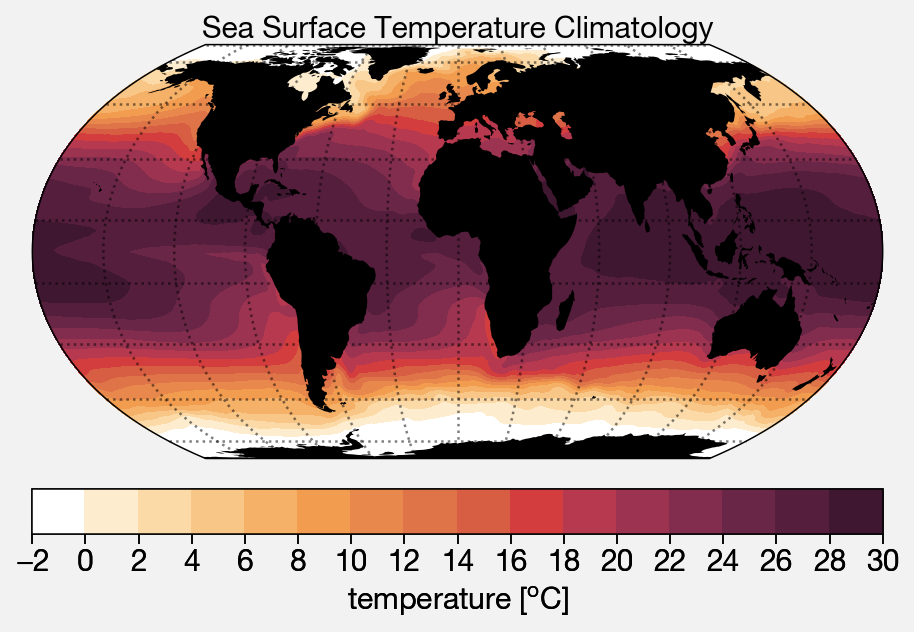

In [5]:
import proplot as plot
import xarray as xr
import proplot as plot
plot.rc.small = 12
plot.rc.large = 12

# Load data
SST = xr.open_dataarray('../data/SST.HadNOAA.1970-2010.1deg.nc')

# Your colormap here!
cmap = 'Fire'

# Plot data
f, ax = plot.subplots(proj='eqearth', axwidth='12cm')
p = ax.contourf(SST.lon, SST.lat, SST, levels=plot.arange(-2, 30, 2), cmap=cmap, globe=True)
f.colorbar(p, loc='b', ticks=plot.arange(-2, 30, 2), label='temperature [$^{o}$C]')
ax.format(land=True, title='Sea Surface Temperature Climatology')

# Uncomment this to save your figure (feel free to rename it)
# f.save('../figures/SST.climatology.png')

### Atmospheric Data

500hPa Geopotential Height and Specific Humidity from January 1st 2018 for the [ERA5 product](https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era5).

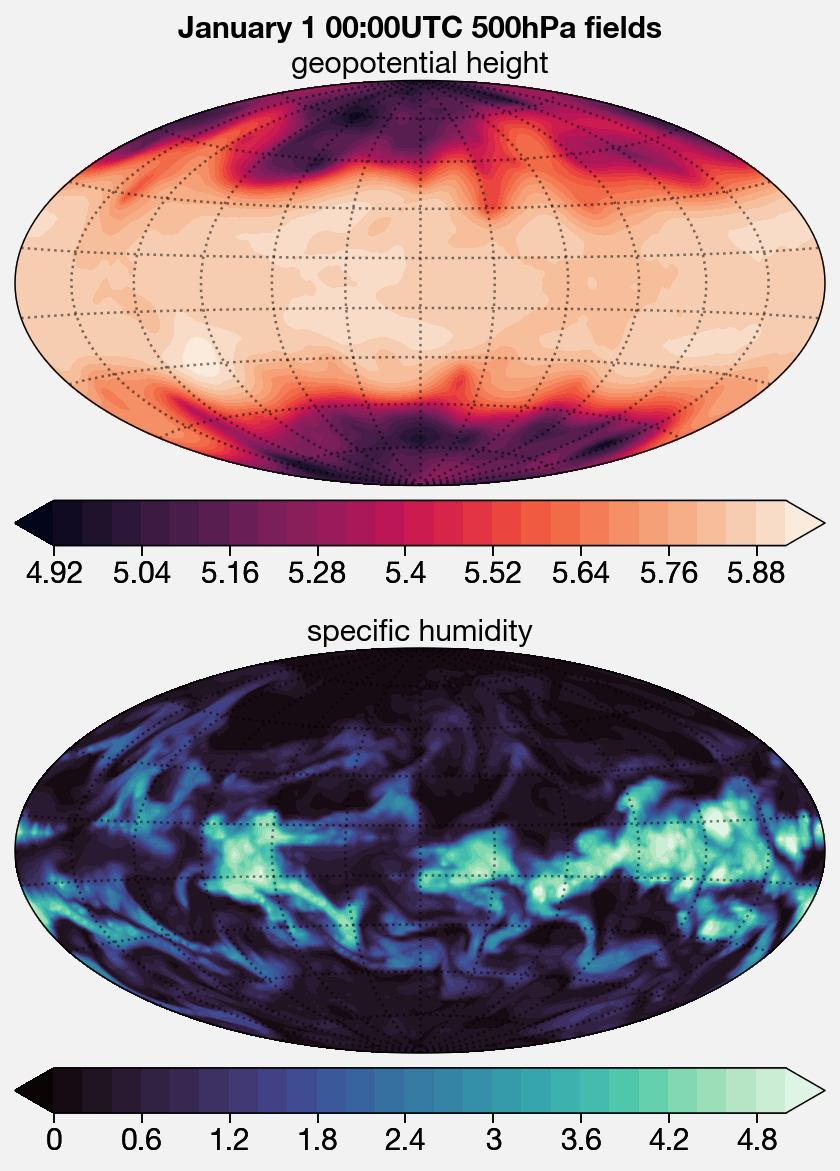

In [6]:
import proplot as plot
import xarray as xr

# Load data
sel = {'time':0, 'longitude':slice(None,None,10), 'latitude':slice(None,None,10)}
data = xr.open_dataset('../data/ERA5.500mb.2018-01-01.nc')
cdict = {'latitude':7, 'longitude':7}
cc = (data['q'].isel(time=0)*1000).coarsen(cdict, boundary='trim').mean()
geo = (data['z'].isel(time=0)/1e3/9.81).coarsen(cdict, boundary='trim').mean()
cc.attrs.update({'units':'g kg**-1', 'long_name':'specific humidity'})
geo.attrs.update({'units':'m', 'long_name':'geopotential height'})

# Your colormaps here!
cmap1 = 'Rocket'
cmap2 = 'Mako'

# Plot data
N = 30
f, axs = plot.subplots(nrows=2, proj='hammer', axwidth=4.5)
axs[0].contourf(geo, cmap=cmap1, N=N, colorbar='b', extend='both', globe=True)
axs[1].contourf(cc, vmin=0, vmax=5, cmap=cmap2, N=N, colorbar='b', extend='both', globe=True)
axs.format(suptitle='January 1 00:00UTC 500hPa fields')

# Uncomment this to save your figure (feel free to rename it)
# f.save('../figures/500mb.png')

### Sea Ice Data

Sea ice thickness for Feb-Mar and Oct-Nov in the northern and southern hemispheres from [ICESat](https://nsidc.org/data/NSIDC-0393) averaged over the satellite coverage period.

In [7]:
import xarray as xr

# Load sea ice data
ice_data = []
for hemisphere, season in zip(['NH', 'NH', 'SH', 'SH'], 
                              ['fm', 'on', 'fm', 'on']):
    filepath = f'../data/ICESat_gridded_mean_thickness_{hemisphere}_{season}.interp0.5x0.5.nc'
    sea_ice = xr.open_dataset(filepath)
    ice_data.append(sea_ice)
ice_data = xr.concat(ice_data, 'location')
ice_data['location'] = ['NH_fm', 'NH_on', 'SH_fm', 'SH_on']

# Coarsen to a 1x1 degree grid.
lat = ice_data['t_lat'].coarsen({'t_lat': 2, 't_lon': 2}).mean()
lon = ice_data['t_lon'].coarsen({'t_lat': 2, 't_lon': 2}).mean()
ice_thk = ice_data['HI'].reset_coords(drop=True).coarsen({'t_lat': 2, 't_lon': 2}).mean()

tornado.application - ERROR - Exception in callback functools.partial(<function Kernel.enter_eventloop.<locals>.advance_eventloop at 0x10e5e3268>)
Traceback (most recent call last):
  File "/Users/ldavis/miniconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/Users/ldavis/miniconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 314, in advance_eventloop
    eventloop(self)
TypeError: 'NoneType' object is not callable


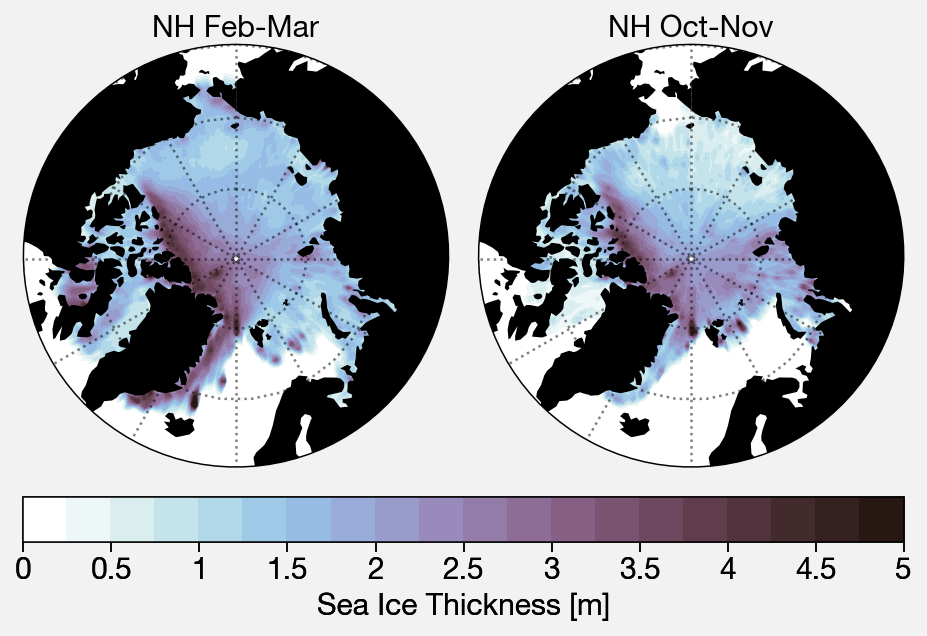

In [8]:
import proplot as plot

# Your colormap here!
cmap = 'Glacial'

# Plot data
f, axs = plot.subplots(ncols=2, proj='npstere', axwidth='6cm')
for i, label in zip([0, 1], ['NH Feb-Mar', 'NH Oct-Nov']):
    p = axs[i].contourf(lon, lat, ice_thk.isel(location=i), cmap=cmap,
                    levels=plot.arange(0, 5, 0.25))
    axs[i].format(land=True, boundinglat=60, latlines=10, title=label)

f.colorbar(p, loc='b', label='Sea Ice Thickness [m]',
           ticks=plot.arange(0, 5, 0.5))

# Uncomment this to save your figure (feel free to rename it)
# f.save('../figures/NH.sea.ice.png')

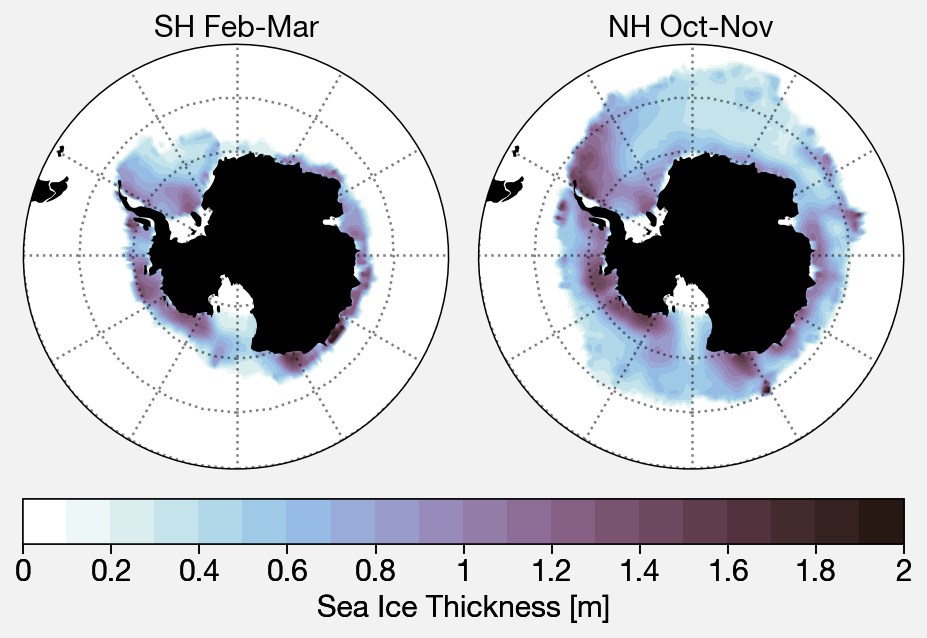

In [9]:
import proplot as plot
plot.rc.small = 12
plot.rc.large = 12

# Your colormap here!
cmap = 'Glacial'

# Plot data
f, axs = plot.subplots(ncols=2, proj='spstere', axwidth='6cm')
for i, label in zip([0, 1], ['SH Feb-Mar', 'NH Oct-Nov']):
    p = axs[i].contourf(lon, lat, ice_thk.isel(location=i+2), cmap=cmap,
                    levels=plot.arange(0, 2, 0.1))
    axs[i].format(land=True, boundinglat=-50, latlines=10, title=label)

f.colorbar(p, loc='b', label='Sea Ice Thickness [m]',
           ticks=plot.arange(0, 2, 0.2))

# Uncomment this to save your figure (feel free to rename it)
# f.save('../figures/SH.sea.ice.png')

## Diverging Colormaps

These examples anticipate a diverging colormap. They are mainly comprised of anomalies. 

### Precipitation Change in SSP585

Change in precipitation for a single CESM2 ensemble member from CMIP6 over the SSP585 scenario (analogous to the RCP8.5 scenario from CMIP5). Here we subtract the 1970-2000 climatology from the 2070-2100 climatology.

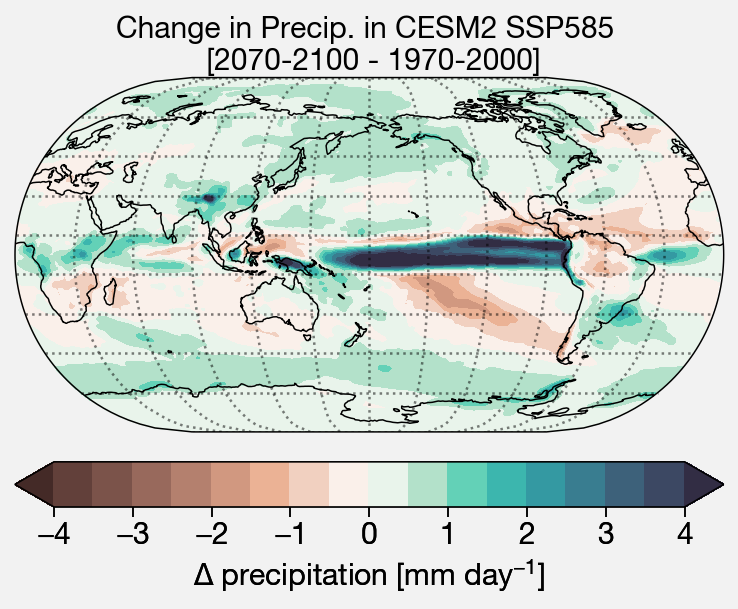

In [10]:
import xarray as xr
import proplot as plot

# Load data
delta_rain = xr.open_dataarray('../data/CESM2_delta_precip_2070-2100_1970-2000.nc')

# Your colormap here!
cmap = 'Moisture'

# Plot data
f, ax = plot.subplots(proj='eck3', proj_kw={'central_longitude': 180}, axwidth='10cm')

p = ax.contourf(delta_rain.lon, delta_rain.lat, delta_rain, 
            levels=plot.arange(-4, 4, 0.5), cmap=cmap,
            extend='both')

f.colorbar(p, loc='b', label='$\Delta$ precipitation [mm day$^{-1}$]',
           ticks=plot.arange(-4, 4, 1))

ax.format(coast=True, title='Change in Precip. in CESM2 SSP585 \n [2070-2100 - 1970-2000]')

# Uncomment this to save your figure (feel free to rename it)
# f.save('../figures/delta_precip.png')

### Global Regression of SSTs onto ENSO

Regression of global SSTs for a single CESM1 Large Ensemble member onto the Nino 3.4 index for the member. This shows the response of SSTs to a 1-degree El Niño.

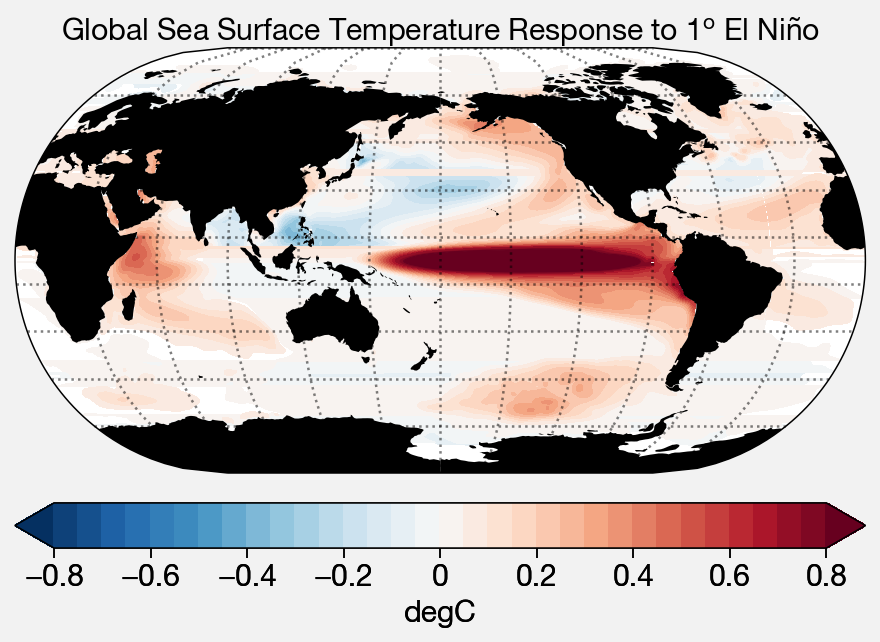

In [11]:
import xarray as xr
import proplot as plot

# Load data
enso_response = xr.open_dataarray('../data/SST_ENSO_response.nc')

# Your colormap here!
cmap = 'BuRd'

# Plot data
f, ax = plot.subplots(proj='eck3', 
                      proj_kw={'central_longitude': 180}, 
                      axwidth='12cm')

p = ax.contourf(enso_response.TLONG, enso_response.TLAT, enso_response, 
            levels=plot.arange(-0.8, 0.8, 0.05), cmap=cmap,
            extend='both')

f.colorbar(p, loc='b', label='degC',
           ticks=plot.arange(-0.8, 0.8, 0.2))

ax.format(land=True, 
          title='Global Sea Surface Temperature Response to 1$^{o}$ El Ni$\~n$o')

# Uncomment this to save your figure (feel free to rename it)
# f.savefig('../figures/enso_response.png')